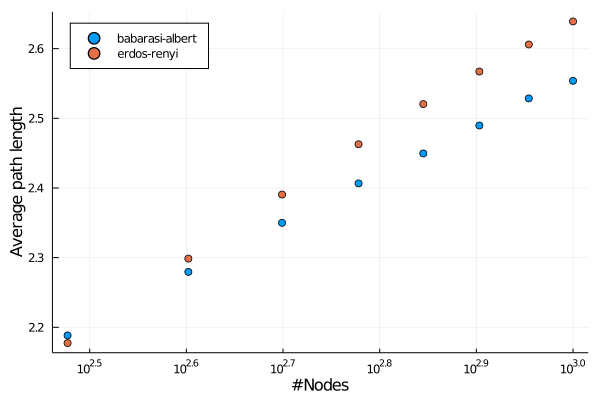

In [11]:
using Plots
using LightGraphs

function avg_path_length(g::SimpleGraph)
    path_lengths = Vector{UInt32}()
    nodes = vertices(g)
    for vertex in nodes
        dijkstra = dijkstra_shortest_paths(g, vertex)
        for d in dijkstra.dists
            if d == 0
                continue
            end
            push!(path_lengths, d)
        end
    end
    node_count = size(nodes, 1)
    return sum(path_lengths) / (node_count * (node_count - 1))
end

avg_barabasi = Vector{Float32}()
avg_erdos = Vector{Float32}()

for i in 300:100:1000
    avg_path = 0.0
    for n=1:10
         g = barabasi_albert(i, 10)
         avg_path += avg_path_length(g) / 10.0
    end
    push!(avg_barabasi, avg_path)
    avg_path = 0.0
    for n=1:10
        g = erdos_renyi(i, 10*i)
        avg_path += avg_path_length(g) / 10.0
    end
    push!(avg_erdos, avg_path)
    IJulia.clear_output(true)
    scatter(300:100:i, avg_barabasi, label="babarasi-albert")
    xlabel!("#Nodes")
    ylabel!("Average path length")
    scatter!(300:100:i, avg_erdos, xaxis=:log, label="erdos-renyi", legend=:topleft) |> IJulia.display
end

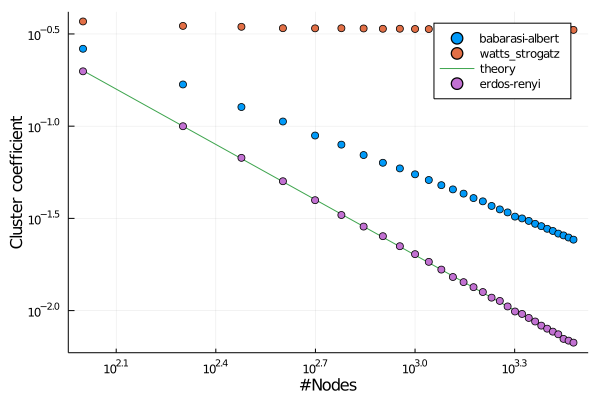

In [12]:
using Plots
using LightGraphs

cluster_barabasi = Vector{Float32}()
cluster_erdos = Vector{Float32}()
cluster_sm = Vector{Float32}()
for i in 100:100:3000
    cluster_coefficient = 0.0
    for n=1:10
         g = barabasi_albert(i, 10)
         cluster_coefficient += global_clustering_coefficient(g) / 10.0
    end
    push!(cluster_barabasi, cluster_coefficient)
    cluster_coefficient = 0.0
    for n=1:10
        g = erdos_renyi(i, 10 * i)
        cluster_coefficient += global_clustering_coefficient(g) / 10.0
    end
    push!(cluster_erdos, cluster_coefficient)
    cluster_coefficient = 0.0
    for n=1:10
        g = watts_strogatz(i, 10, 0.2)
        cluster_coefficient += global_clustering_coefficient(g) / 10.0
    end
    push!(cluster_sm, cluster_coefficient)
    IJulia.clear_output(true)
    scatter(100:100:i, cluster_barabasi, label="babarasi-albert")
    scatter!(100:100:i, cluster_sm, label="watts_strogatz")
    plot!(100:i, x -> 20.0/x, label="theory")
    xlabel!("#Nodes")
    ylabel!("Cluster coefficient")
    scatter!(100:100:i, cluster_erdos, xaxis=:log, yaxis=:log, label="erdos-renyi") |> IJulia.display
end